# DAV 6150 Module 5 Assignment
## Understanding Classification Model Performance Metrics
#### Author: Mahlet Melese
#### Date: June 27, 2023

## 1. Introduction
In this project, we are tasked with calculating a suite of classification model performance metrics via Python code functions that we create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics.We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models.

The data set you will be using for this work is comprised of approximately 180 labeled binary observations. The classifications are either ‘0’ or ‘1’. A classification model has been used to “predict” the actual classifications for each observation, and its algorithm works by estimating the probability that the correct classification for each observation is a ‘1’. The data set includes three attributes that we will make use of for our analysis:
1) class: the actual classification for the observation
2) scored.class: the predicted classification for the observation
3) scored.probability: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation.

## Import Libraries

In [79]:
# load numpy + 'datasets'. We'll use the "iris" data that is provided with sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve




##  2. Exploratory Data Analysis 

#### Part 1. Read dataset from my github  repo and creat pandas dataframe

In [4]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M5_Data.csv" 
df = pd.read_csv(data_url, header=0)
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


In [5]:
# what is the dimensionality of the data?
df.shape

(181, 11)

As we can see above, we have 39644 observations comprised of 61 features. What do the features look like?

In [6]:
# display features of the dataset
df.columns

Index(['pregnant', 'glucose', 'diastolic', 'skinfold', 'insulin', 'bmi',
       'pedigree', 'age', 'class', 'scored.class', 'scored.probability'],
      dtype='object')

#### Data types of all columns

- Pandas.dtypes function helps us to display the data types of all columns as a series.

In [7]:
# Check the data types
df.dtypes

pregnant                int64
glucose                 int64
diastolic               int64
skinfold                int64
insulin                 int64
bmi                   float64
pedigree              float64
age                     int64
class                   int64
scored.class            int64
scored.probability    float64
dtype: object

####  Let's check if there is a missing value
Before answering those questions below , I checked null valus which is a fundamental part of data cleaning.

In [8]:
# recommended code 
df.isna().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

####  Let's get some of the basic statistics of the data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [9]:
df.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


**Here, we have 181 counts, for all the  attributes for the final analysis.**

#### 3. Crosstab() function

Use the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts().

In [10]:
actual=np.array(df['class'])
predicted=np.array(df['scored.class'])

In [64]:
cross_tab_cm = pd.crosstab(actual, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)
cross_tab_cm

Predicted,0,1,All
Actual,,,
0,119,5,124
1,30,27,57
All,149,32,181


- From the above table, we can see that rows represent the actual class where as the columns represent the predicted class.
- The total count is 181 which is the number of observation.

#### 4. Extract TP,FN,FP, and TN

In [65]:
TP=cross_tab_cm[1][1]
FN=cross_tab_cm[0][1]
FP=cross_tab_cm[1][0]
TN=cross_tab_cm[0][0]
print("The number of true postive is ", TP)
print("The number of false negative is ", FN)
print("The number of false postive is ", FP)
print("The number of true negative is ", TN)

The number of true postive is  27
The number of false negative is  30
The number of false postive is  5
The number of true negative is  119


#### 5-9 Accurcy, Precision, Sensitivity/Recall,  Specificity, F1-score

In [66]:
def metrics_func(actual, predicted):
    
    TP = ((predicted == 1) & (actual== 1)).sum()
    FN= ((predicted == 0) & (actual== 1)).sum()
    FP= ((predicted == 1) & (actual== 0)).sum()
    TN=((predicted == 0) & (actual== 0)).sum()
     
    accuracy_score= np.mean(actual==predicted)
    precision_score = (TP) / (TP + FP) 
    recall_score    = TP / (TP + FN)
    specificity_score = TN / (TN + FP)
    f1_score  = (2 * precision_score * recall_score) / (precision_score + recall_score)

    return accuracy_score*100,precision_score*100, recall_score*100, specificity_score*100, f1_score

#### 10. ROC and AUC

In [67]:
def tpr_fpr(df):
    
    actual=np.array(df['class'])
    predicted=np.array(df['scored.class'])
    
    TP = ((predicted == 1) & (actual== 1)).sum()
    FN= ((predicted == 0) & (actual== 1)).sum()
    FP= ((predicted == 1) & (actual== 0)).sum()
    TN=((predicted == 0) & (actual== 0)).sum()
     
    tpr=TP/(TP + FN)
    fpr=FP/(FP+TN)

    return tpr, fpr

- For ROC, we need to calculate "TPr,"FPR" at every threshold by using actual and predicted class.
- For AUC, I used np.trapz() function

In [68]:
def compute_tpr_fpr_array(df):
    
    new_sorted_df = df.sort_values(by=['scored.probability'], ascending=False)
    thresholds = new_sorted_df['scored.probability'].unique()
    tpr_list = []
    fpr_list = []
    for threshold in thresholds:
            new_sorted_df['scored.class'] = np.where(new_sorted_df['scored.probability'] >= threshold, 1, 0)
            
            tpr_fpr_value = tpr_fpr(new_sorted_df)
            
            tpr_list.append(tpr_fpr_value[0])
            fpr_list.append(tpr_fpr_value[1])

    return tpr_list, fpr_list

In [69]:
tpr_list, fpr_list=compute_tpr_fpr_array(df)
auc_score=np.trapz(tpr_list,fpr_list)
auc_score

0.8503112620260328

#### Plot ROC curve

Text(0.5, 1.0, 'AUC=0.8503')

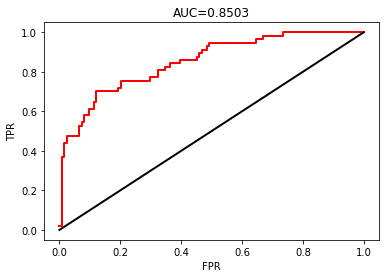

In [73]:
plt.plot(fpr_list,tpr_list, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score, 4)))

#### 11. Apply the Python functions

In [75]:
accuracy_score,precision_score, recall_score, specificity_score, f1_score= metrics_func(actual, predicted)

print("The accuracy is ",accuracy_score )
print("The precision score is ",precision_score )
print("The recall score is ",recall_score )
print("The specificity score is ",specificity_score )
print("The f1 score is ",f1_score )

The accuracy is  80.66298342541437
The precision score is  84.375
The recall score is  47.368421052631575
The specificity score is  95.96774193548387
The f1 score is  0.6067415730337079


#### 12. Compare the output of the functions

In [76]:
confusion_matrix(actual, predicted)

array([[119,   5],
       [ 30,  27]], dtype=int64)

- The confusion mtrix generated using crossta function is the sme as the built in confusion mtrix function result.

##### Metrics result using Sklearn

In [81]:
print("The accuracy is ",accuracy_score(actual, predicted)*100)
print("The precision score is ", precision_score(actual, predicted, pos_label=1)*100)
print("The recall score is ",recall_score(actual, predicted, pos_label=1)*100)
print("The f1 score is ",f1_score(actual, predicted, pos_label=1))

The accuracy is  80.66298342541437
The precision score is  84.375
The recall score is  47.368421052631575
The f1 score is  0.6067415730337079


##### Classification report for model using Sklearn

In [88]:
from sklearn.metrics import classification_report

In [89]:
#print classification report for model
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



**From the above results, we can observe that the results that I was able to generate from functions that I implemented are the same as the pre-built functions using Sklearn. Thus, my implementaions are correct.**


#### 13. ROC and AUC functions from the scikit-learn package

In [86]:
def sklearn_roc_curve(df):
    
    actual=np.array(df['class'])
    predicted=np.array(df['scored.class'])
    prob=np.array(df['scored.probability'])
 
    fpr, tpr, thresholds = roc_curve(actual, prob,pos_label=1)
    auc_score = roc_auc_score(actual, prob)
    plt.plot(fpr,tpr,'r', lw=2)
    plt.plot([0, 1], [0, 1], 'k-', lw=2)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC={}'.format(round(auc_score, 4)))

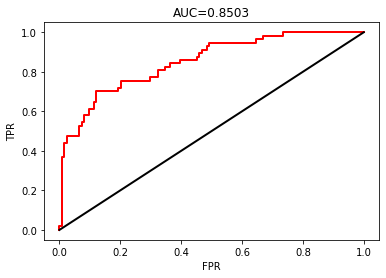

In [87]:
sklearn_roc_curve(df)

**- From the bove, we can observe that using Sklearn's built in function we get the same ROC curve and AUC score as the one that I implemented using my own functions. Thus, the AUC score is 0.8503. In conclusion, in this assignmnet, all the results from my functions agree with the sklearn's built in function results. Thus, my implementations are correct.**